# Part 2: Unsupervised Learning (Optional for Submission will not be considered for grading Submit as a sepearte notebook if you plan to submit)

In this part, we will be applying unsupervised learning approaches to a problem in computational biology. Specifically, we will be analyzing Mice Protein Expression Data Set.

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

### **Classes:**

c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)

c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)

c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)

c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)

t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)

t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)

t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

### **Source** :
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

Dataset: Mice Protein Expression Data Set

### **Attribute Information:**

1 Mouse ID

2..78 Values of expression levels of 77 proteins; the names of proteins are followed by â€œ_nâ€ indicating that they were measured in the nuclear fraction. For example: DYRK1A_n

79 Genotype: control (c) or trisomy (t)

80 Treatment type: memantine (m) or saline (s)

81 Behavior: context-shock (CS) or shock-context (SC)

82 Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

Data source is on Coursework.

## Loading Dataset

In [ ]:
mice_pro_df1 = pd.read_csv('/content/Data_Cortex_Nuclear.csv')
mice_pro_df1

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


## Check for missing values

**2.0.1 Check for missing values in the dataset get count of missing values in all columns**

In [ ]:
# Your code here

## Impute the missing variables using multivariate feature imputation

**2.0.2 Impute the missing variables using multivariate feature imputation (use IterativeImputer from sklearn.impute).** Make sure you remove categorical variables before imputing and Scaling

In [ ]:
# Your code here

## Scale the data using standardScaler

**2.0.3 Scale the data using StandardScaler**

In [ ]:
# Your code here

Our goal in this exercise is to use dimensionality reduction and clustering to visualize and better understand the high-dimensional protein matrix. We will use the following pipeline:

Use PCA to project the protein matrix to a lower-dimensional linear subspace.
Cluster the data using K-means on the first 50 principal components.
Use t-SNE to project the first 20 principal components onto two dimensions. Visualize the points and color by their clusters from (2).

## 2.1 PCA
**2.1.1 Perform PCA and project the protein matrix onto its first 50 principal components. You may use sklearn.decomposition.PCA.**

In [ ]:
# Your code here

**2.1.2 Plot the cumulative proportion of variance explained as a function of the number of principal components. How much of the total variance in the dataset is explained by the first 20 principal components?**

In [ ]:
# Your code here

**2.1.3 For the first principal component, report the top 10 loadings (weights) and their corresponding protein names.** In other words, which 10 proteins are weighted the most in the first principal component?


In [ ]:
# Your code here

**2.1.4 Plot the projection of the data onto the first two principal components using a scatter plot.**

In [ ]:
# Your code here

**2.1.5 Now, use a small multiple of four scatter plots to make the same plot as above, but colored by four annotations in the categorical columns: 'Genotype', 'Treatment', 'Behavior', 'class'. Include a legend for the labels.** For example, one of the plots should have points projected onto PC 1 and PC 2, colored by their Genotype.

In [ ]:
# Your code here

**2.1.6 Based on the plots above, the first two principal components correspond to which aspect of the mice? What is the intrinsic dimension that they are describing?**

In [ ]:
# Your answer here

## 2.2 K-means

While the annotations provide high-level information on mice type (e.g. class has 8 categories), we may also be interested in finding more granular subtypes of mice. To achieve this, we will use K-means clustering to find a large number of clusters in the gene expression dataset. Note that the original gene expression matrix had over many noisy features, which is not ideal for clustering. So, we will perform K-means clustering on the first 20 principal components of the dataset.

**2.2.1 Implement a kmeans function which takes in a dataset X and a number of clusters k, and returns the cluster assignment for each point in X. You may NOT use sklearn for this implementation. Use lecture 6, slide 14 as a reference.**

In [ ]:
from scipy.spatial import distance
def kmeans(X, k, iters=10):
    '''Groups the points in X into k clusters using the K-means algorithm.

    Parameters
    ----------
    X : (m x n) data matrix
    k: number of clusters
    iters: number of iterations to run k-means loop

    Returns
    -------
    y: (m x 1) cluster assignment for each point in X
    '''
    # Your code here
   

Before applying K-means on the gene expression data, we will test it on the following synthetic dataset to make sure that the implementation is working.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


Text(0, 0.5, '$x_2$')

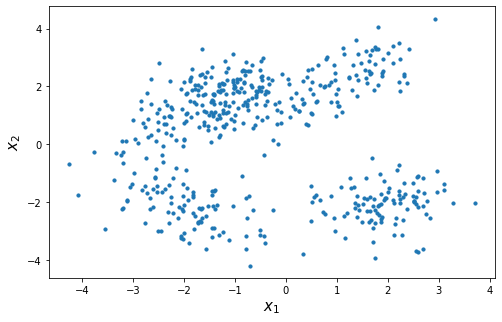

In [ ]:
np.random.seed(0)
x_1 = np.random.multivariate_normal(mean=[1, 2], cov=np.array([[0.8, 0.6], [0.6, 0.8]]), size=100)
x_2 = np.random.multivariate_normal(mean=[-2, -2], cov=np.array([[0.8, -0.4], [-0.4, 0.8]]), size=100)
x_3 = np.random.multivariate_normal(mean=[2, -2], cov=np.array([[0.4, 0], [0, 0.4]]), size=100)
x_4 = np.random.multivariate_normal(mean=[-2, 1], cov=np.array([[0.6, 0.4], [0.4, 0.6]]), size=100)
x_5 = np.random.multivariate_normal(mean=[-1, 2], cov=np.array([[-0.4, 0], [0, -0.4]]), size=100)
X = np.vstack([x_1, x_2, x_3,x_4,x_5])

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

**2.2.2 Apply K-means with k=5 to the synthetic dataset above. Plot the points colored by their K-means cluster assignments to verify that your implementation is working.**

In [ ]:
# Your code here

**2.2.3 Use K-means with k=20 to cluster the first 20 principal components of the protein data.**

In [ ]:
# Your code here

## 2.3 t-SNE

In this final section, we will visualize the data again using t-SNE - a non-linear dimensionality reduction algorithm. You can learn more about t-SNE in this interactive tutorial: https://distill.pub/2016/misread-tsne/.

**2.3.1 Use t-SNE to reduce the first 20 principal components of the protein dataset to two dimensions. You may use sklearn.manifold.TSNE. Note that it is recommended to first perform PCA before applying t-SNE to suppress noise and speed up computation.**

In [ ]:
# Your code here

**2.3.2 Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions.**

In [ ]:
# Your code here

**2.3.3 Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions, with points colored by their cluster assignments from part 2.**

In [ ]:
# Your code here

**2.3.4 Why is there overlap between points in different clusters in the t-SNE plot above?**